In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = "data/stop_smoking.csv"
stop = pd.read_csv(filename)

In [4]:
stop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Entity                       774 non-null    object 
 1   Code                         774 non-null    object 
 2   Year                         774 non-null    int64  
 3   AvgCigarettePriceDollars     208 non-null    float64
 4   AvgTaxesAsPctCigarettePrice  209 non-null    float64
 5   EnforceBansTobaccoAd         774 non-null    int64  
 6   HelpToQuit                   774 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 42.5+ KB


look at Entity categorical There are 2 entries for one entity and 4 each for all others. Can use one-hot encode

In [30]:
stop.groupby("Year").agg({"AvgCigarettePriceDollars":"mean"})
#We also need to take inflation into account

,AvgCigarettePriceDollars
Year,
2007,NaN
2010,NaN
2012,4.143333
2014,4.522170


In [68]:
gbe = stop.groupby("Entity").agg({"AvgCigarettePriceDollars":"mean"}).dropna()

In [69]:
gbe

,AvgCigarettePriceDollars
Entity,
Algeria,1.965
Argentina,3.130
Armenia,1.715
Australia,9.440
Austria,5.155
...,...
Venezuela,5.950
Vietnam,2.280
Yemen,1.825


In [70]:
gbe.loc["United States",:]

AvgCigarettePriceDollars    6.07
Name: United States, dtype: float64

<AxesSubplot:>

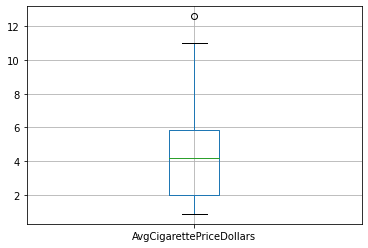

In [71]:
gbe.boxplot()

In [53]:
taxbe = stop.groupby("Entity").agg({"AvgTaxesAsPctCigarettePrice":"mean"}).dropna()

<AxesSubplot:>

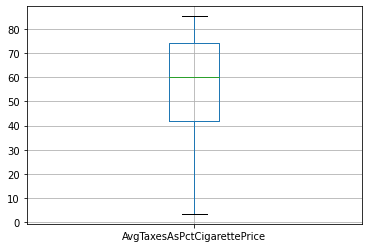

In [54]:
taxbe.boxplot()

In [56]:
taxbe.loc["United States",:]

AvgTaxesAsPctCigarettePrice    42.9
Name: United States, dtype: float64

In [72]:
forceq = stop.groupby("Entity").agg({"EnforceBansTobaccoAd":"max","HelpToQuit":"max"}).dropna()

In [73]:
forceq.groupby("EnforceBansTobaccoAd").count()

,HelpToQuit
EnforceBansTobaccoAd,
2,58
3,1
4,105
5,30


In [74]:
forceq.groupby("HelpToQuit").count()

,EnforceBansTobaccoAd
HelpToQuit,
1,1
2,13
3,49
4,105
5,26


In [75]:
forceq.loc["United States",:]

EnforceBansTobaccoAd    2
HelpToQuit              5
Name: United States, dtype: int64

In [ ]:
ww = pd.read_csv("data/")